# **ANÁLISIS ITERATIVO DE LAS CATEGORÍAS IDEOLÓGICAS EN WIKIPEDIA**
#### Ramón Zamora, carné 10233

## INTRODUCCIÓN
El presente proyecto utiliza herramientas de análisis de texto computacional para llevar a cabo un exploración de los datos de los artículos vinculados a las categorías de distintas ideologías que se pueden encontrar en la enciclopedia digial Wikipedia. Para llevar a cabo este ejercicio se utilizarán las librerías de ...

In [1]:
import wikipediaapi
import pickle
from pprint import pprint
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dcss.text import bigram_process, preprocess, bow_to_df
from dcss.plotting import format_axes_commas, custom_seaborn
from dcss.utils import sparse_groupby
custom_seaborn()
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import scipy
from itertools import islice

In [2]:
wiki_wiki = wikipediaapi.Wikipedia('Ciencias Sociales Computacionales (ramonzamora89@gmail.com)', 'en')

In [3]:
#1. Busqueda de Anarquismo
cat_anarchism = wiki_wiki.page("Category:Anarchism")
print("Anarchism exist: %s" % cat_anarchism.exists())
# 2. Busqueda de Autoritarismo
cat_authoritarianism = wiki_wiki.page("Category:Authoritarianism")
print("Authoritarianism exist: %s" % cat_authoritarianism.exists())
# 3. Busqueda de Pensamiento comunitario
cat_communitarianism = wiki_wiki.page("Category:Communitarianism")
print("Communitarianism exist: %s" % cat_communitarianism.exists())
# 4. Busqueda de Comunismo
cat_communism = wiki_wiki.page("Category:Communism")
print("Communism exist: %s" % cat_communism.exists())
# 5. Busqueda de Conservadurismo
cat_conservatism = wiki_wiki.page("Category:Conservatism")
print("Conservatism exist: %s" % cat_conservatism.exists())
# 6. Busqueda de Corporativismo
cat_corporatism = wiki_wiki.page("Category:Corporatism")
print("Corporatism exist: %s" % cat_corporatism.exists())
# 7. Busqueda de Ambiantalismo
cat_environmentalism = wiki_wiki.page("Category:Environmentalism")
print("Environmentalism exist: %s" % cat_environmentalism.exists())
# 8. Busqueda de Facismo
cat_fascism = wiki_wiki.page("Category:Fascism")
print("Fascism exist: %s" % cat_fascism.exists())
# 9. Fascism de Liberalismo
cat_liberalism = wiki_wiki.page("Category:Liberalism")
print("Liberalism exist: %s" % cat_liberalism.exists())
# 10. Busqueda de Libterarismo
cat_libertarianism = wiki_wiki.page("Category:Libertarianism")
print("Libertarianism exist: %s" % cat_libertarianism.exists())
# 11. Busqueda de Nacionalismo
cat_nationalism = wiki_wiki.page("Category:Nationalism")
print("Nationalism exist: %s" % cat_nationalism.exists())
# 12. Busqueda de Populismo
cat_populism = wiki_wiki.page("Category:Populism")
print("Populism exist: %s" % cat_populism.exists())

Anarchism exist: True
Authoritarianism exist: True
Communitarianism exist: True
Communism exist: True
Conservatism exist: True
Corporatism exist: True
Environmentalism exist: True
Fascism exist: True
Liberalism exist: True
Libertarianism exist: True
Nationalism exist: True
Populism exist: True


In [4]:
data = []
pages_names = cat_anarchism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_anarchism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_authoritarianism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_authoritarianism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_communitarianism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_communitarianism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_communism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_communism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_conservatism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_conservatism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_corporatism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_corporatism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_environmentalism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_environmentalism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_fascism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_fascism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_liberalism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_liberalism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_libertarianism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_libertarianism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_nationalism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_nationalism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_populism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_populism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )


df = pd.DataFrame(data)

In [5]:
df.to_csv('../data/ideologías.csv')

In [6]:
columns = ['Category', 'Namespace', 'Title', 'Summary', 'Content']
wiki_df = pd.read_csv('../data/ideologías.csv')
wiki_df.dropna(subset = ['Title', 'Summary'], inplace=True)
wiki_df =wiki_df.query('Namespace < 1')
wiki_df['Category'].value_counts()

Category:Authoritarianism (id: 36055803, ns: 14)    151
Category:Environmentalism (id: 737047, ns: 14)      124
Category:Liberalism (id: 724440, ns: 14)            108
Category:Communism (id: 722710, ns: 14)              95
Category:Nationalism (id: 846456, ns: 14)            87
Category:Conservatism (id: 780171, ns: 14)           75
Category:Corporatism (id: 21722509, ns: 14)          73
Category:Fascism (id: 889991, ns: 14)                69
Category:Populism (id: 19997168, ns: 14)             62
Category:Anarchism (id: 780754, ns: 14)              44
Category:Libertarianism (id: 1543366, ns: 14)        39
Category:Communitarianism (id: 49526307, ns: 14)     16
Name: Category, dtype: int64

In [7]:
content_keep = [
    'Category:Authoritarianism (id: 36055803, ns: 14)',
    'Category:Environmentalism (id: 737047, ns: 14)',
    'Category:Liberalism (id: 724440, ns: 14)',
    'Category:Communism (id: 722710, ns: 14)',
    'Category:Nationalism (id: 846456, ns: 14)',
    'Category:Conservatism (id: 780171, ns: 14)',
    'Category:Corporatism (id: 21722509, ns: 14)',
    'Category:Fascism (id: 889991, ns: 14)',
    'Category:Populism (id: 19997168, ns: 14)',
    'Category:Anarchism (id: 780754, ns: 14)',
    'Category:Libertarianism (id: 1543366, ns: 14)',
    'Category:Communitarianism (id: 49526307, ns: 14)'
]
content_subset = wiki_df[wiki_df['Category'].isin(content_keep)].copy()
content_subset.reset_index(drop=True, inplace=True)
total_content_counts = content_subset['Category'].value_counts()
total_content_counts

Category:Authoritarianism (id: 36055803, ns: 14)    151
Category:Environmentalism (id: 737047, ns: 14)      124
Category:Liberalism (id: 724440, ns: 14)            108
Category:Communism (id: 722710, ns: 14)              95
Category:Nationalism (id: 846456, ns: 14)            87
Category:Conservatism (id: 780171, ns: 14)           75
Category:Corporatism (id: 21722509, ns: 14)          73
Category:Fascism (id: 889991, ns: 14)                69
Category:Populism (id: 19997168, ns: 14)             62
Category:Anarchism (id: 780754, ns: 14)              44
Category:Libertarianism (id: 1543366, ns: 14)        39
Category:Communitarianism (id: 49526307, ns: 14)     16
Name: Category, dtype: int64

In [8]:
sampled_contents = content_subset.groupby('Category').sample(replace=False, frac=.1, random_state=23)
len(sampled_contents)

95

In [9]:
with open('../data/pickles/sampled_wiki_ideologias_content.pkl', 'wb') as fp:
    pickle.dump(sampled_contents, fp)
sampled_contents_counts = sampled_contents['Category'].value_counts()
sample_sizes = pd.DataFrame(zip(total_content_counts, sampled_contents_counts), columns=['Total', 'Sample'], index=content_keep)

In [10]:
sampled_contents['content_len'] = sampled_contents['Content'].apply(lambda x: len(x.split()))

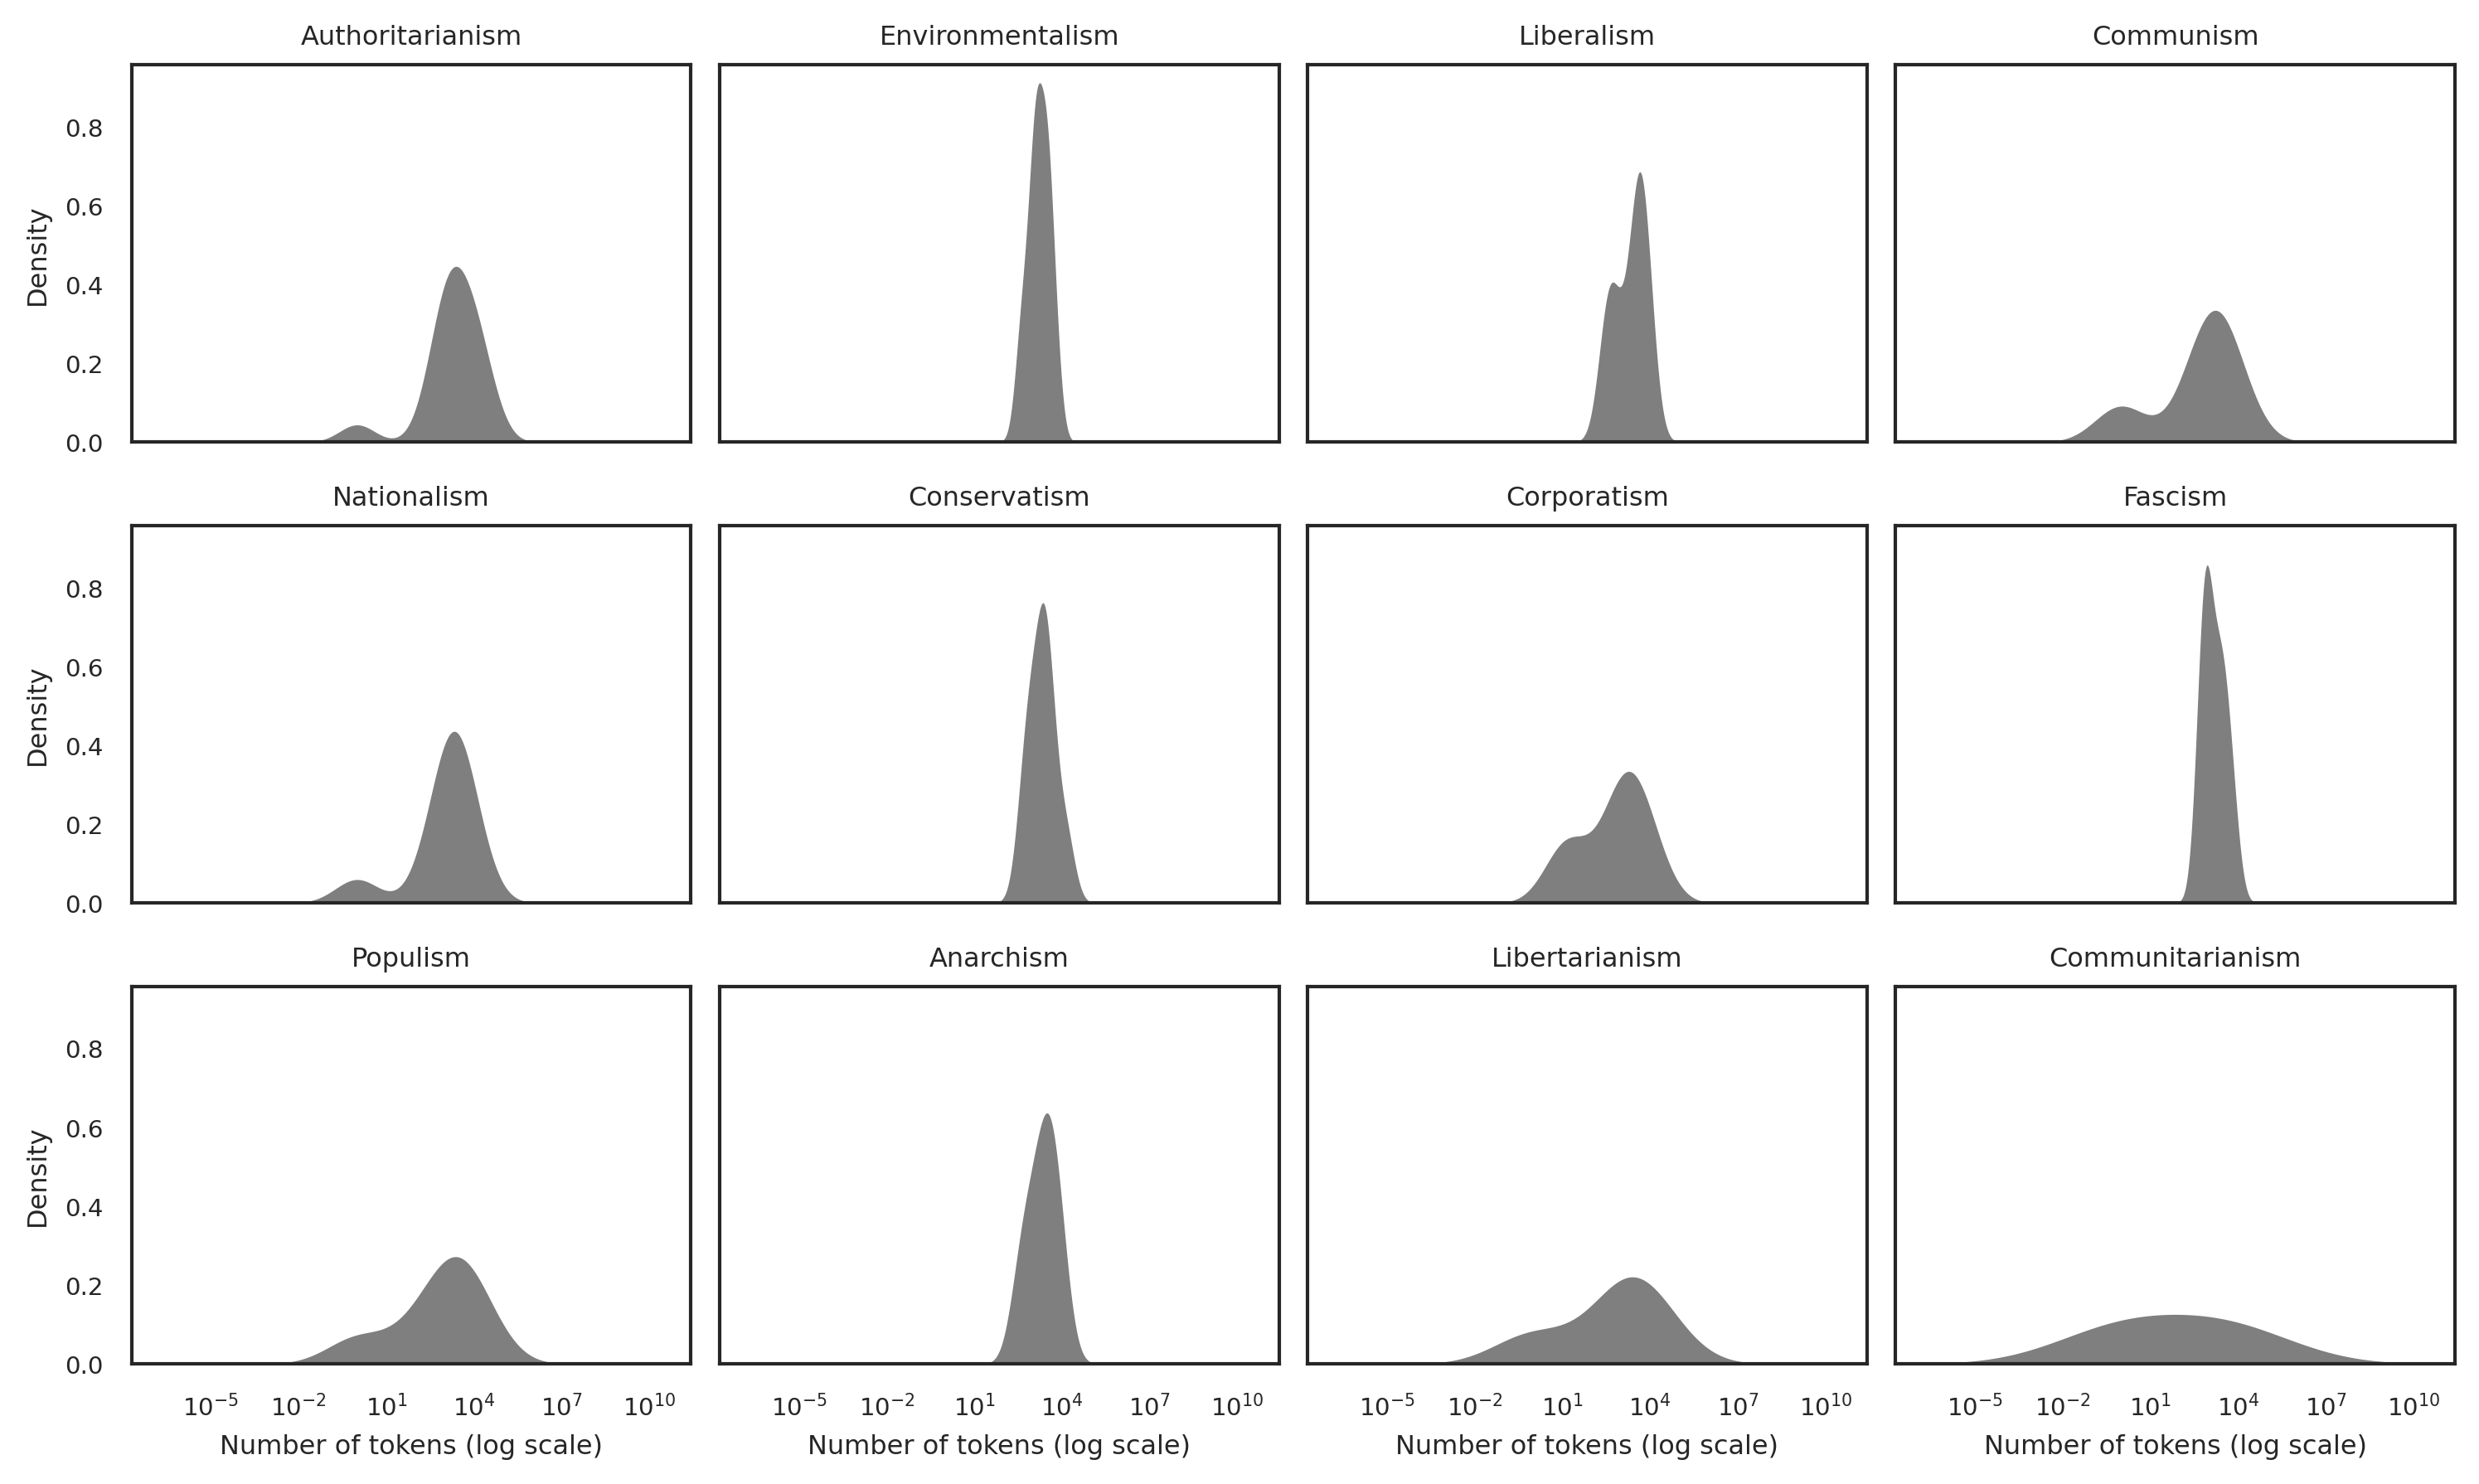

In [11]:
categories = sampled_contents.groupby('Category')
def categoria_subplot(subgroup, title, position):
    sns.kdeplot(ax = position, data=subgroup, x='content_len', log_scale=True, fill=True, alpha=.5, linewidth=0, color='black') 
    position.set(xlabel='Number of tokens (log scale)', title=title)
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 6))

categoria_subplot(categories.get_group('Category:Authoritarianism (id: 36055803, ns: 14)'), 'Authoritarianism', ax[0,0])
categoria_subplot(categories.get_group('Category:Environmentalism (id: 737047, ns: 14)'), 'Environmentalism', ax[0,1])
categoria_subplot(categories.get_group('Category:Liberalism (id: 724440, ns: 14)'), 'Liberalism', ax[0,2])
categoria_subplot(categories.get_group('Category:Communism (id: 722710, ns: 14)'), 'Communism', ax[0,3])
categoria_subplot(categories.get_group('Category:Nationalism (id: 846456, ns: 14)'),'Nationalism', ax[1,0])
categoria_subplot(categories.get_group('Category:Conservatism (id: 780171, ns: 14)'), 'Conservatism', ax[1,1])
categoria_subplot(categories.get_group('Category:Corporatism (id: 21722509, ns: 14)'), 'Corporatism', ax[1,2])
categoria_subplot(categories.get_group('Category:Fascism (id: 889991, ns: 14)'), 'Fascism', ax[1,3])
categoria_subplot(categories.get_group('Category:Populism (id: 19997168, ns: 14)'),'Populism', ax[2,0])
categoria_subplot(categories.get_group('Category:Anarchism (id: 780754, ns: 14)'), 'Anarchism', ax[2,1])
categoria_subplot(categories.get_group('Category:Libertarianism (id: 1543366, ns: 14)'), 'Libertarianism', ax[2,2])
categoria_subplot(categories.get_group('Category:Communitarianism (id: 49526307, ns: 14)'), 'Communitarianism', ax[2,3])

plt.tight_layout()
plt.show()
fig.savefig("graficadensidadWiki")

In [12]:
bigram_model, preprocessed = preprocess(sampled_contents['Content'], nlp=nlp, bigrams= True, detokenize = True, n_process=4)

In [13]:
len(preprocessed)

95

In [14]:
with open('../data/pickles/processed_sample_contents.pkl', 'wb') as fp:
    pickle.dump(preprocessed, fp)

with open('../data/pickles/sample_contents_bigram_model.pkl', 'wb') as fp:
    pickle.dump(bigram_model, fp)

with open('../data/pickles/processed_sample_contents.pkl', 'rb') as fp:
    preprocessed = pickle.load(fp)

In [15]:
sampled_contents.iloc[90]['Content']

"[Section: Africa (1):\n\nSubsections (17):\nSection: Burundi (2):\nPierre Nkurunziza\nSubsections (0):\n\nSection: Cameroon (2):\nPaul Biya\nSubsections (0):\n\nSection: Egypt (2):\nGamal Abdel Nasser\nAbdel Fattah el-Sisi\nSubsections (0):\n\nSection: Equatorial Guinea (2):\nTeodoro Obiang Nguema Mbasogo\nSubsections (0):\n\nSection: Gabon (2):\nAli Bongo Ondimba\nSubsections (0):\n\nSection: The Gambia (2):\nYahya Jammeh\nSubsections (0):\n\nSection: Kenya (2):\nRaila Odinga\nSubsections (0):\n\nSection: Liberia (2):\nGeorge Weah\nSubsections (0):\n\nSection: Libya (2):\nMuammar Gaddafi\nSubsections (0):\n\nSection: Rwanda (2):\nPaul Kagame\nSubsections (0):\n\nSection: South Africa (2):\nEconomic Freedom Fighters\nFreedom Front Plus\nJacob Zuma\nSubsections (0):\n\nSection: Sudan (2):\nOmar al-Bashir\nSubsections (0):\n\nSection: Tanzania (2):\nJohn Magufuli\nSubsections (0):\n\nSection: Tunisia (2):\nKais Saied\nHeart of Tunisia\nSubsections (0):\n\nSection: Uganda (2):\nIdi Amin\

In [16]:
sampled_contents['preprocessed'] = preprocessed

In [17]:
sampled_contents.iloc[90]['preprocessed']

'section africa subsections_section burundi_pierre nkurunziza subsections_section cameroon paul biya subsections_section egypt gamal_abdel nasser_abdel fattah_el sisi subsections_section teodoro_obiang nguema_mbasogo subsections_section subsections_section gambia_yahya jammeh subsections_section kenya_raila odinga subsections_section liberia george weah subsections_section libya muammar_gaddafi subsections_section rwanda paul kagame subsections_section south africa economic freedom fighter freedom plus_jacob zuma subsections_section sudan_omar al bashir subsections_section tanzania john magufuli subsections_section saied_heart tunisia subsections_section uganda_idi amin_yoweri museveni subsections_section zambia michael sata subsections_section pf subsections_section america subsections_section argentina néstor_kirchner cristina_fernández de kirchner subsections_section bolivia_evo subsections_section brazil fernando_collor mello_getúlio vargas lula_da silva present jair_bolsonaro pres

In [18]:
count_vectorizer = CountVectorizer(max_df=.1, min_df=3, strip_accents='ascii',)

In [19]:
count_matrix = count_vectorizer.fit_transform(preprocessed)
vocabulary = count_vectorizer.get_feature_names_out()
count_matrix.shape

(95, 2158)

In [20]:
with open('../data/pickles/count_matrix.pkl', 'wb') as fp:
    pickle.dump(count_matrix, fp)

with open('../data/pickles/vocabulary.pkl', 'wb') as fp:
    pickle.dump(vocabulary, fp)

In [21]:
count_data = pd.DataFrame.sparse.from_spmatrix(count_matrix)
count_data.columns = vocabulary
count_data.index = sampled_contents['Category']
count_data.shape

(95, 2158)

In [22]:
print('sparse szie: ' +str(count_data.memory_usage().sum()/1048576) + "MB")
print('sparse density: ' +str(count_data.sparse.density))

sparse szie: 0.12183761596679688MB
sparse density: 0.051621872103799815


In [23]:
count_data_d = count_data.sparse.to_dense()
print('dense size:' + str(count_data_d.memory_usage().sum()/1048576) + "MB")

dense size:1.5648269653320312MB


In [24]:
category_counts = sparse_groupby(sampled_contents['Category'], count_matrix, vocabulary)
results = category_counts.div(category_counts.sum(axis=1), axis=0)
results_t = results.T 
results_t.sample(20, random_state=1006)

                  Category:Anarchism (id: 780754, ns: 14)  \
boston                                           0.002179   
thoreau                                          0.168845   
flight                                           0.000000   
peronism                                         0.000000   
keen                                             0.001089   
decree                                           0.000000   
hugo_chavez                                      0.000000   
environmentalist                                 0.000000   
unemployment                                     0.000000   
fox                                              0.000000   
incitement                                       0.000000   
guarantee                                        0.001089   
depiction                                        0.000000   
colombia                                         0.000000   
feedback                                         0.000000   
trouble                 

In [25]:
n_top_words = 5
top_words_per_category = {}

for category in results_t.columns:
    top = results_t[category].nlargest(n_top_words)
    top_words_per_category[category] = list(zip(top.index, top))

for k, v in top_words_per_category.items():
    print(k.upper())
    for each in v:
        print(each)
    print('\n')

CATEGORY:ANARCHISM (ID: 780754, NS: 14)
('thoreau', 0.16884531590413943)
('novel', 0.018518518518518517)
('wall', 0.018518518518518517)
('utopia', 0.015250544662309368)
('prison', 0.014161220043572984)


CATEGORY:AUTHORITARIANISM (ID: 36055803, NS: 14)
('trump', 0.07045009784735812)
('argentina', 0.01532941943900848)
('argentine', 0.01141552511415525)
('autocratic', 0.01141552511415525)
('autocracy', 0.011089367253750815)


CATEGORY:COMMUNISM (ID: 722710, NS: 14)
('bolshevik', 0.018867924528301886)
('bolsheviks', 0.014428412874583796)
('comintern', 0.01220865704772475)
('dutch', 0.01220865704772475)
('marxian', 0.01220865704772475)


CATEGORY:COMMUNITARIANISM (ID: 49526307, NS: 14)
('centrist', 0.2607260726072607)
('democrat', 0.0297029702970297)
('successor', 0.019801980198019802)
('mp', 0.0165016501650165)
('bangladesh', 0.013201320132013201)


CATEGORY:CONSERVATISM (ID: 780171, NS: 14)
('peru', 0.02249134948096886)
('tory', 0.00980392156862745)
('moon', 0.006343713956170703)
('comin

In [26]:
diff_con_snp = results_t['Category:Authoritarianism (id: 36055803, ns: 14)'] - results_t['Category:Environmentalism (id: 737047, ns: 14)']
diff_con_snp.sort_values(ascending=False, inplace=True)
auth_not_snp = diff_con_snp.head(20)
env_not_snp = diff_con_snp.tail(20)


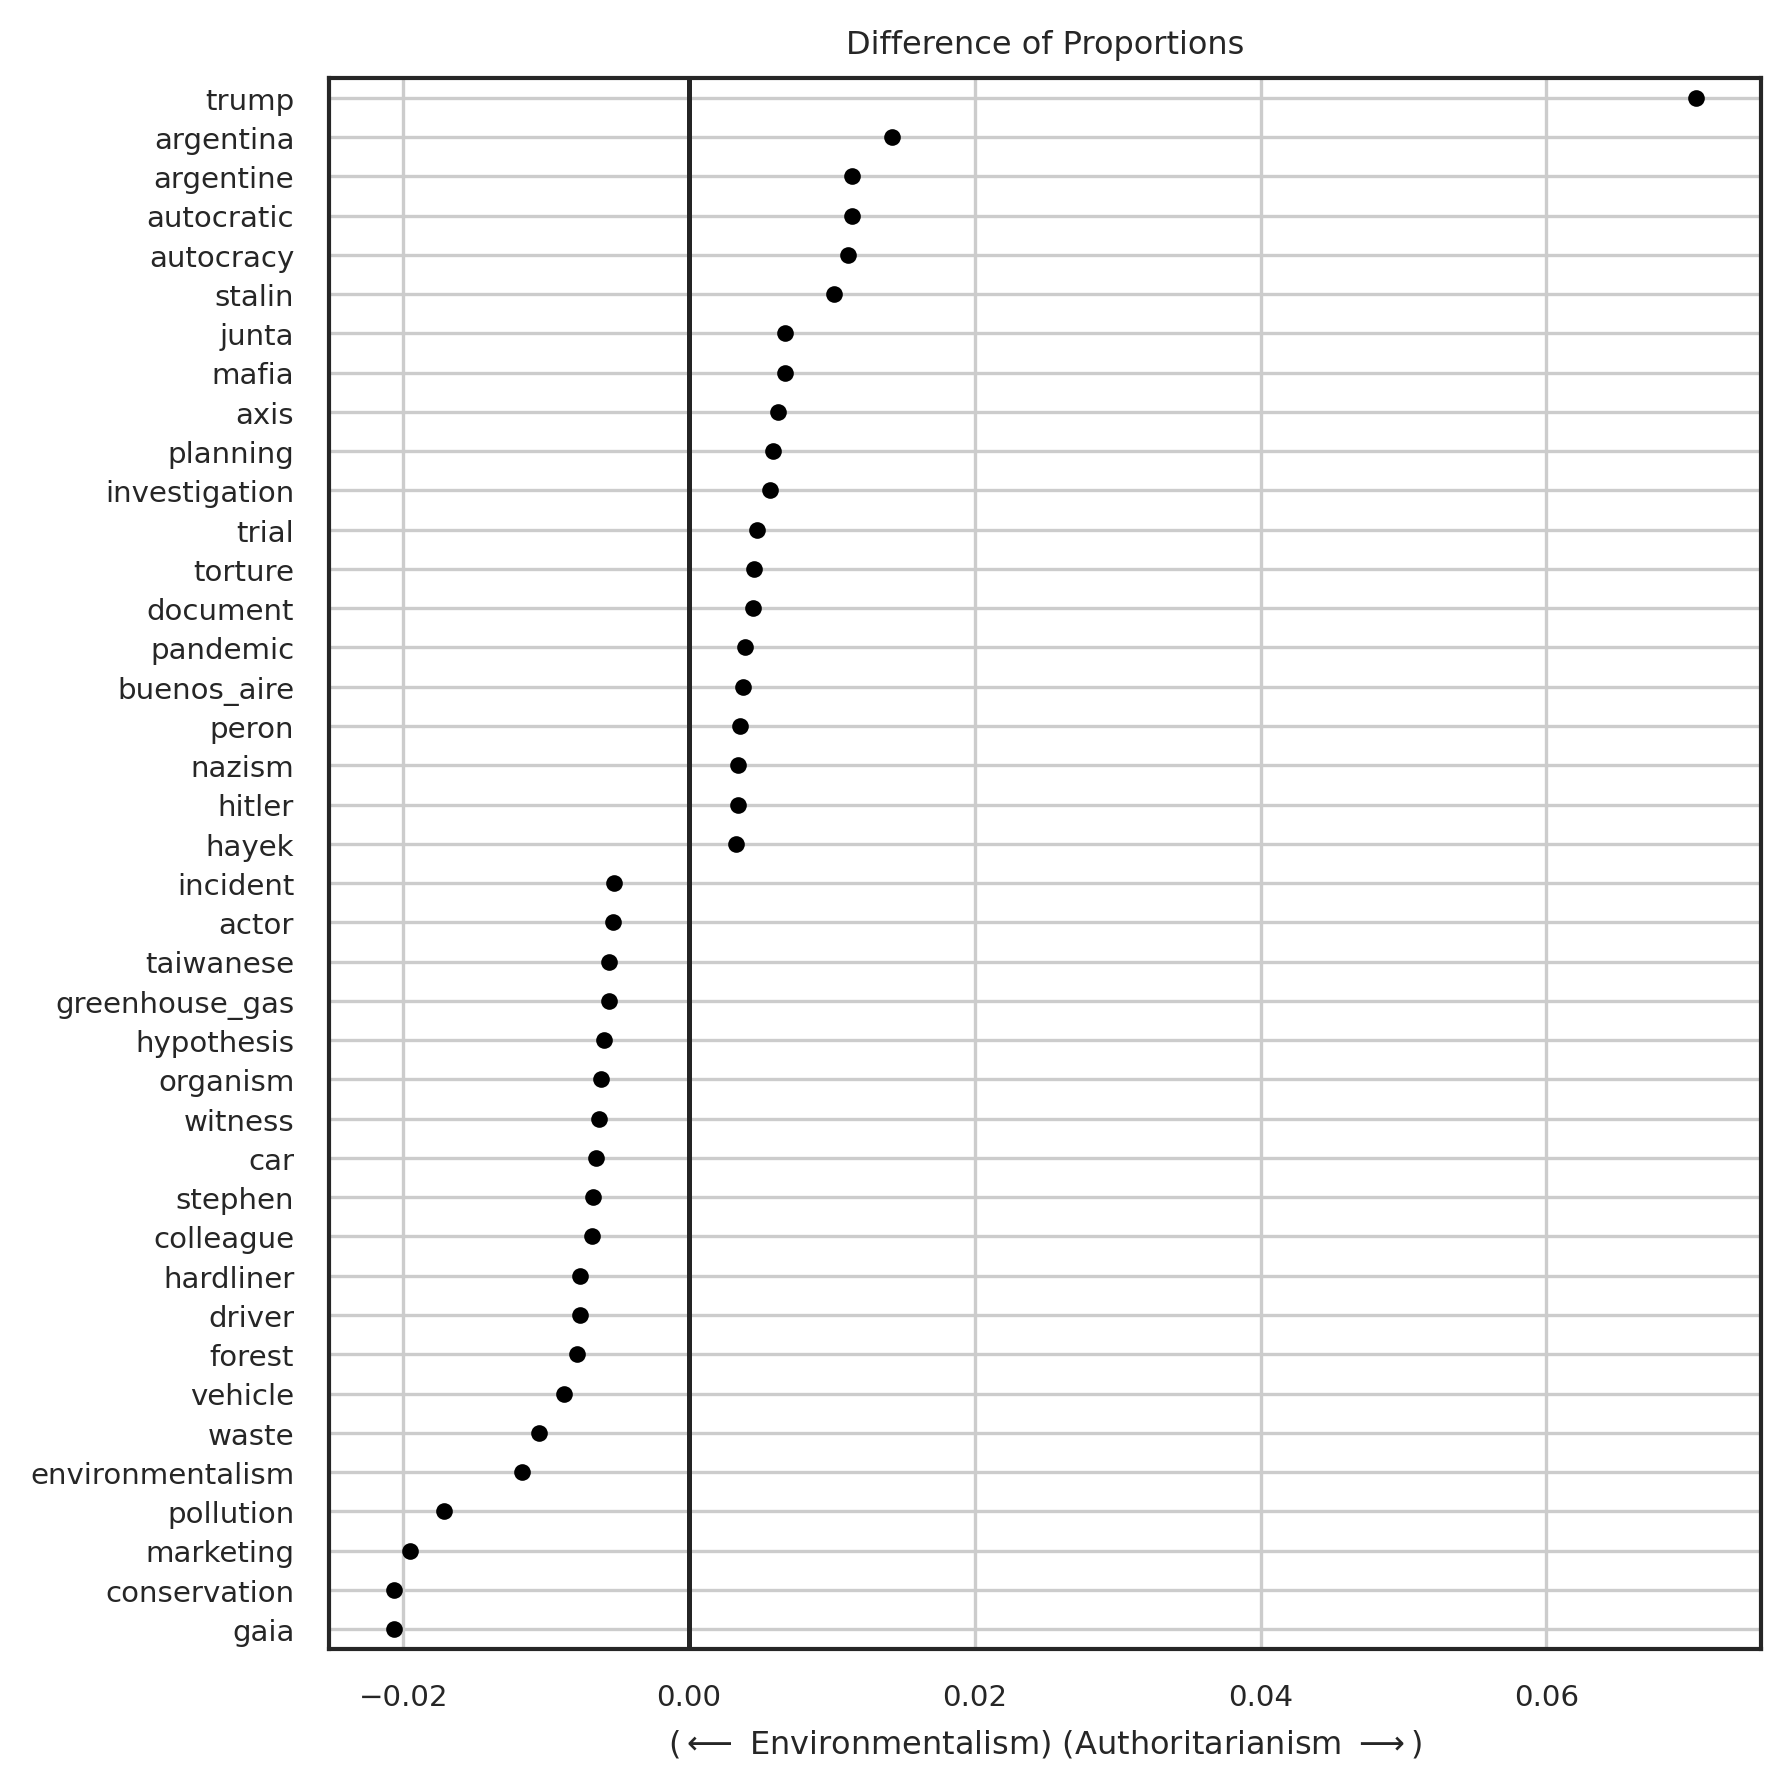

In [27]:
dop = pd.concat([auth_not_snp, env_not_snp])
fig, ax = plt.subplots(figsize= (6,6))
sns.swarmplot(x=dop, y=dop.index, color='black', size=4)
ax.axvline(0)
plt.grid()
ax.set(xlabel=r'($\longleftarrow$ Environmentalism) (Authoritarianism $\longrightarrow$)', ylabel='', title='Difference of Proportions')
plt.tight_layout()
plt.show()
fig.savefig("tabla_comparativa.png")